In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

In [138]:
df=pd.read_csv('C:/Users/User/Desktop/디지털하나로/CardData_new.csv',encoding='cp949')
df

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,Gso9Jlid,2,47,1,20170630,18,0,0,0,0,...,3,3,2,9,5,5,16,0,0,21.Active_연속
299996,EDQYlTTX,2,69,1,20150417,45,0,0,0,0,...,2,2,2,1,0,0,0,12,12,22.Active_간헐
299997,82GwFS1D,1,36,1,20120608,79,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
299998,LUYeNjki,1,48,1,20120508,80,1,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


In [139]:
df1=df[df['고객구분'] == '21.Active_연속']
df2 = df1.sample(n=10000, random_state=42)

# 클러스터링

In [140]:
df3=df2[[  '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]

In [141]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

# 코사인 유사도 계산
cosine_sim1 = cosine_similarity(scaled_matrix1)

# 데이터 프레임 형태로 저장
cosine_sim_df1 = pd.DataFrame(cosine_sim1, df3.index, columns=df3.index)
cosine_sim_df1.iloc[:4,:4]

,159882,50633,195274,13202
159882,1.000000,-0.199556,0.466990,0.339791
50633,-0.199556,1.000000,-0.469281,-0.235457
195274,0.466990,-0.469281,1.000000,0.494270
13202,0.339791,-0.235457,0.494270,1.000000


In [142]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,random_state=38).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster
0,3
1,1
2,0
3,0
4,1


In [10]:
predict.value_counts()   

Cluster
1          2750
3          2359
0          1754
2          1695
4          1442
dtype: int64

In [11]:
df2['cluster']=predict['Cluster'].values
df2

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,cluster
159882,yqynMez3,2,44,1,20161018,27,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,3
50633,EB0GYUYG,2,62,1,20171017,15,1,0,0,0,...,11,6,2,2,2,8,1,0,21.Active_연속,1
195274,uSdVrL2y,2,47,1,20050921,160,1,0,0,0,...,1,1,1,0,0,0,12,12,21.Active_연속,0
13202,gwS9lWrR,2,49,1,20140724,54,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,0
208687,YUSrGrhc,1,60,1,19950822,281,1,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89312,N7ca583r,2,53,1,20130418,69,0,0,1,1,...,1,1,10,2,2,6,8,7,21.Active_연속,2
212704,MjuiYTXj,2,32,1,20140303,58,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,3
146771,fpocz37z,2,30,1,20170323,22,1,0,0,0,...,8,5,0,3,3,8,3,3,21.Active_연속,0
180089,gP7GzwHX,1,55,1,19931231,300,0,0,0,0,...,11,4,1,4,4,13,0,0,21.Active_연속,1


In [128]:
df3

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,cluster
159882,260800,0,198090,324040,27900,0,154000,91650,803604,56700,...,0,0,0,22000,50000,0,710300,31000,0,3
50633,0,0,0,0,0,0,0,0,0,0,...,0,0,900,0,0,0,0,0,0,1
195274,594640,0,132720,555410,55120,0,907770,0,239425,440000,...,0,0,0,86970,84400,285100,791100,36000,134906,0
13202,235800,13500,350540,333050,23120,32000,0,11880,63000,5800,...,0,0,3000,137950,3200,29000,102000,60000,0,0
208687,63000,0,5000,0,0,0,0,0,0,0,...,0,0,0,0,221330,0,34000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89312,60600,0,56940,43160,86000,0,123969,70000,79800,0,...,0,0,0,19000,54200,7000,87500,75500,0,2
212704,217400,2552900,66040,48950,34890,0,1166194,0,0,0,...,0,0,12500,77600,20200,0,357900,0,0,3
146771,3000,0,0,0,35200,0,0,218030,171000,0,...,0,0,0,62600,497240,0,293100,227500,0,0
180089,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,0,0,0,0,0,1


In [129]:
cluster_mean=df3.groupby('cluster').mean()
cluster_mean

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
cluster,,,,,,,,,,,,,,,,,,,,,
0,406763.999430,151243.427024,240076.528506,212450.352338,153535.558723,68307.027366,970989.555302,69178.675599,262521.455530,90689.513113,...,120736.555302,65.159635,1654.054732,139149.511973,105211.214367,454703.011973,201219.370011,957173.870582,74886.929875,180491.295325
1,17706.731273,2577.560000,5846.665455,6285.741818,2285.930909,530.767273,44083.953818,1598.254545,11739.991273,6081.458182,...,7750.768000,0.000000,0.000000,7671.742182,1394.814545,26729.225455,2703.098182,28895.929091,915.763636,3313.190182
2,123040.851327,27580.838348,52493.679056,53606.294395,18625.545723,14941.901475,241084.348673,19395.320944,98803.789971,27521.106195,...,86403.234218,33.021239,3609.697935,53615.281416,13217.914454,139477.738643,124742.293215,204615.136283,11176.802360,57756.380531
3,245861.493853,85211.973718,126898.013565,111895.831708,44115.844850,39531.153031,459280.538788,43180.225519,192369.699449,71558.258584,...,118119.604917,380.425604,15209.894447,169184.818143,28045.570157,322780.850360,127796.387028,353588.570157,31425.752437,146101.996609
4,82742.652566,12969.181692,36100.325936,38208.144244,11771.809986,5619.972261,175998.180305,10831.539528,73841.691401,20857.000000,...,39763.043689,2.288488,276.981969,22100.524965,8422.545076,101856.857836,40240.450763,135876.991678,6032.461859,24673.887656


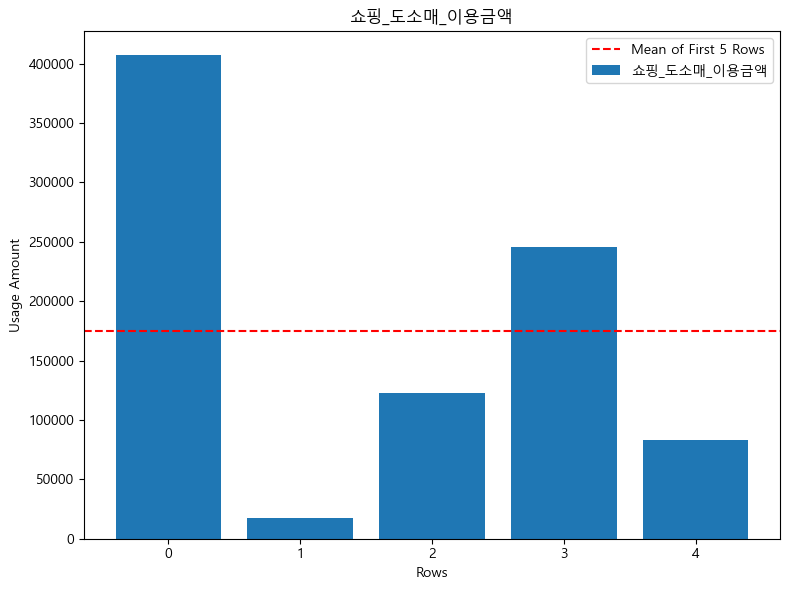

In [133]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the bar graph for the first 5 rows
plt.bar(range(5), cluster_mean['쇼핑_도소매_이용금액'][:5], label='쇼핑_도소매_이용금액')

# Plotting the red line for the mean of the first 5 rows
plt.axhline(y=mean_of_first_5_rows['쇼핑_도소매_이용금액'], color='r', linestyle='--', label='Mean of First 5 Rows')

plt.xlabel('Rows')
plt.ylabel('Usage Amount')
plt.title('쇼핑_도소매_이용금액')
plt.legend()

plt.xticks(range(5))
plt.tight_layout()
plt.show()

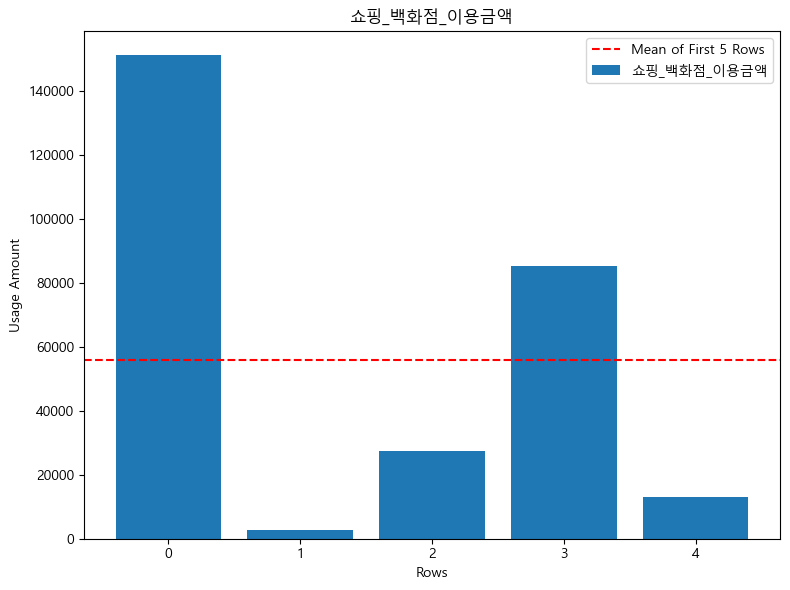

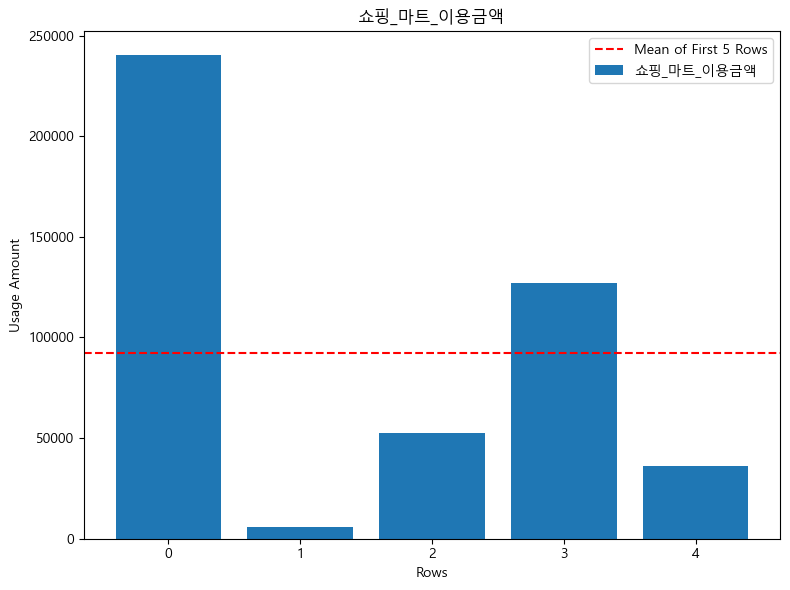

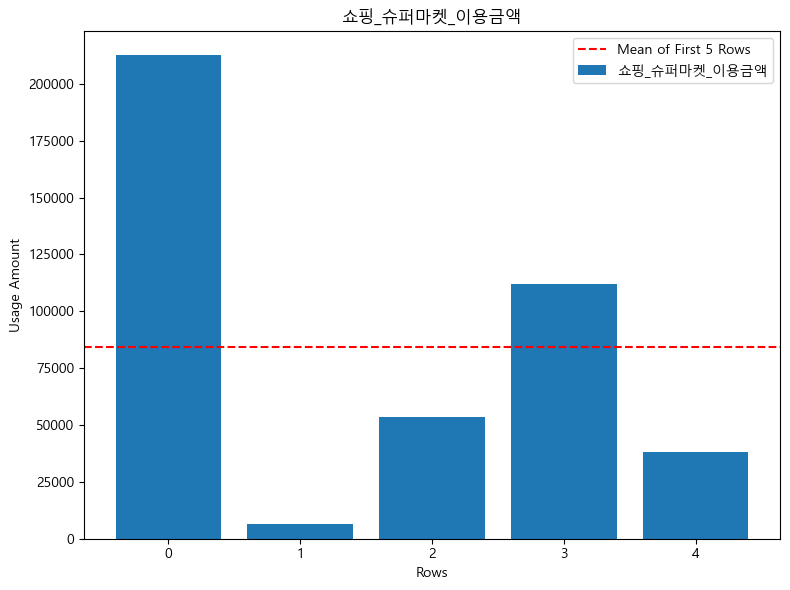

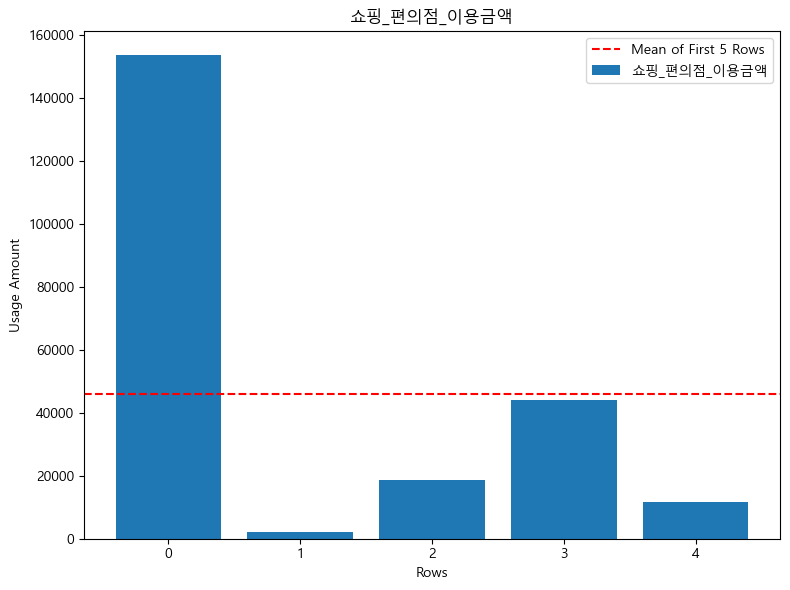

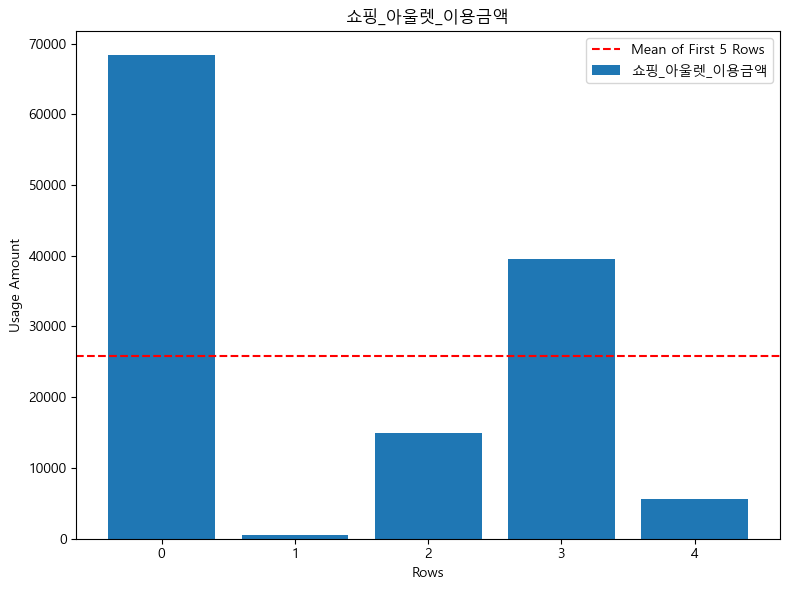

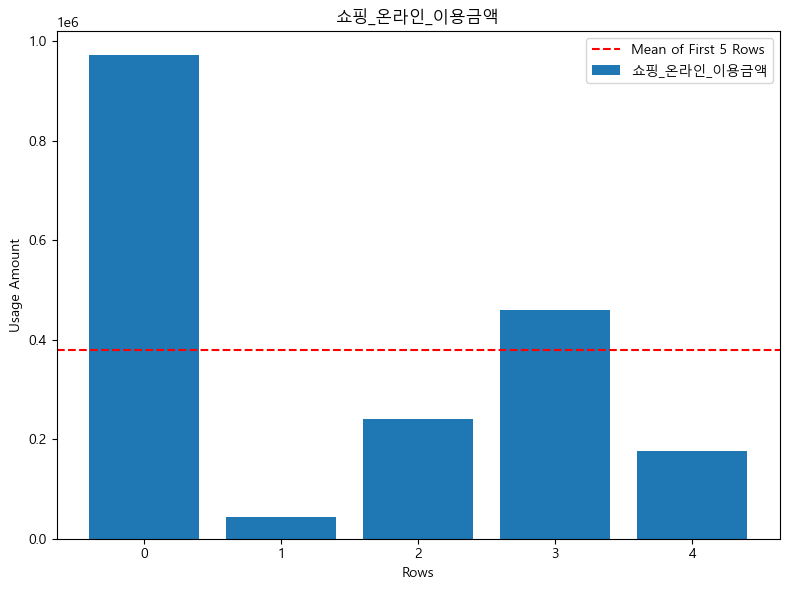

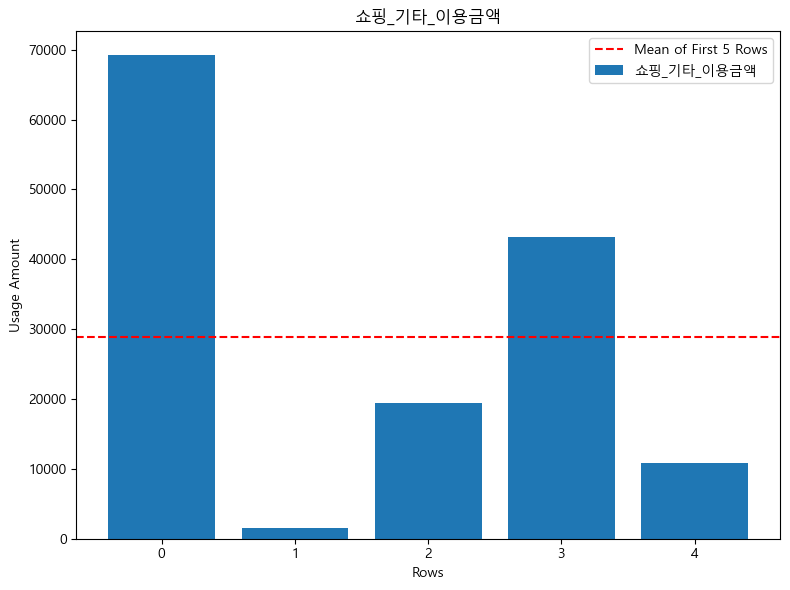

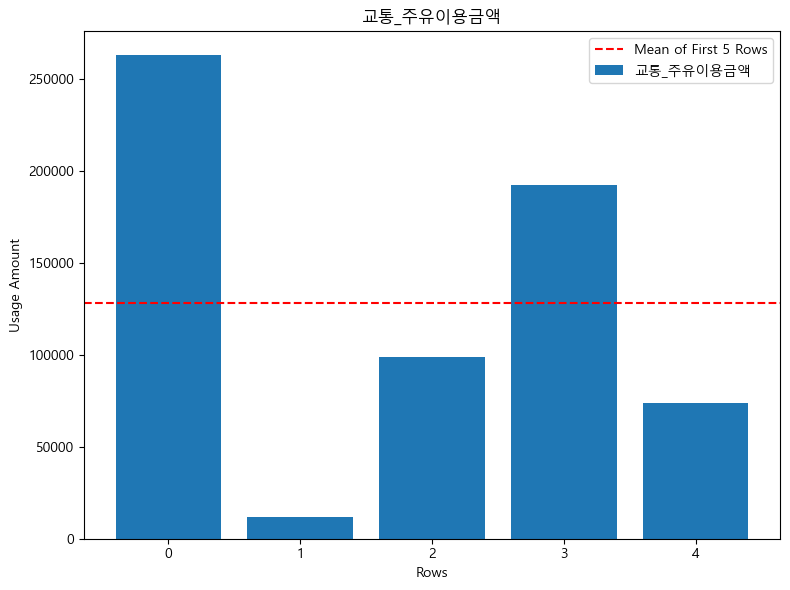

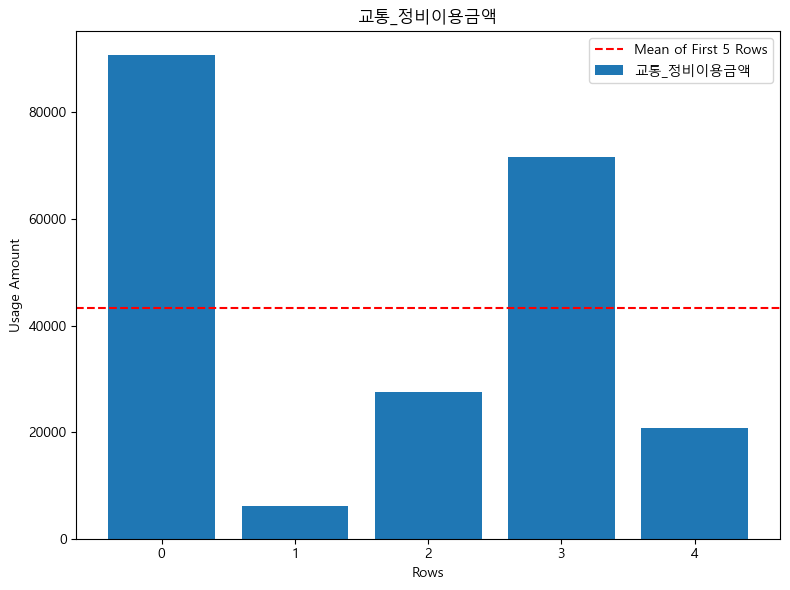

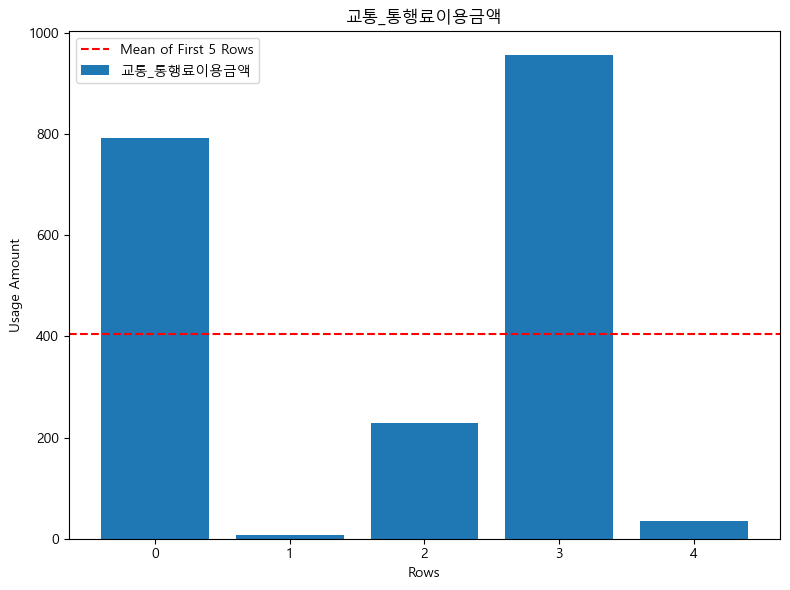

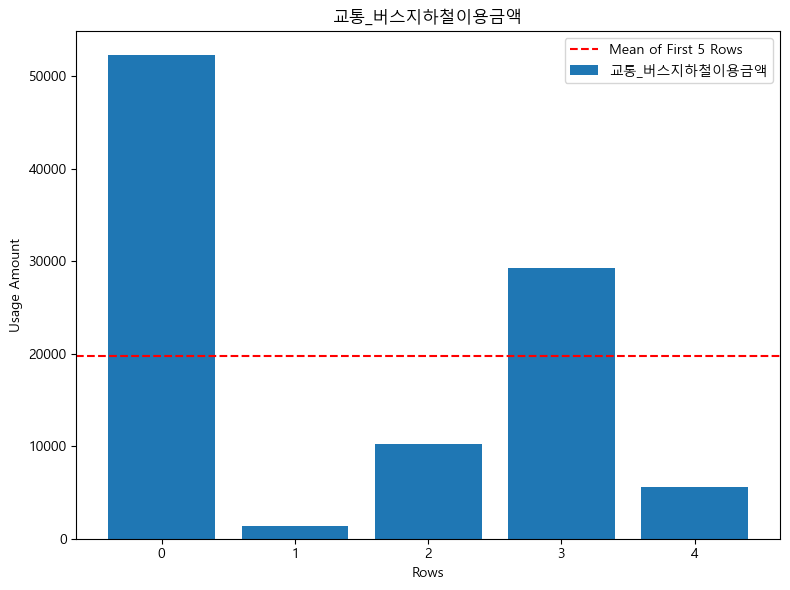

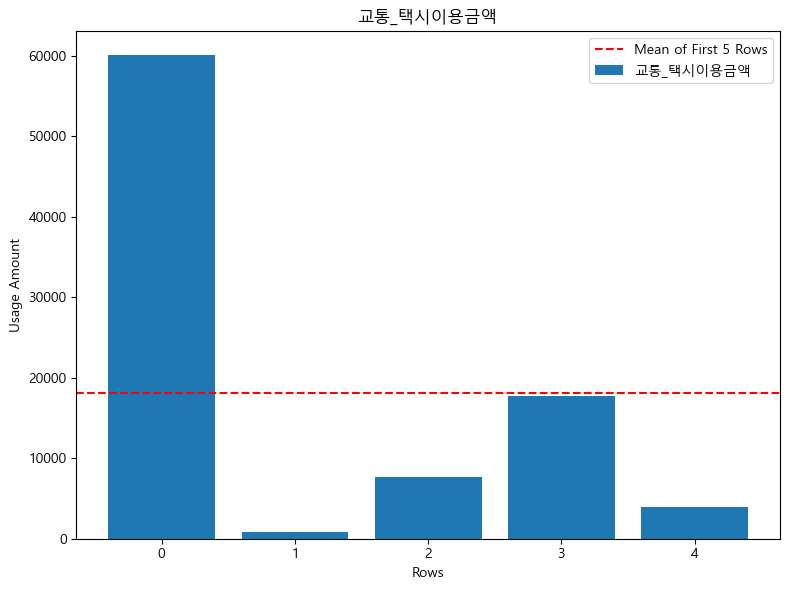

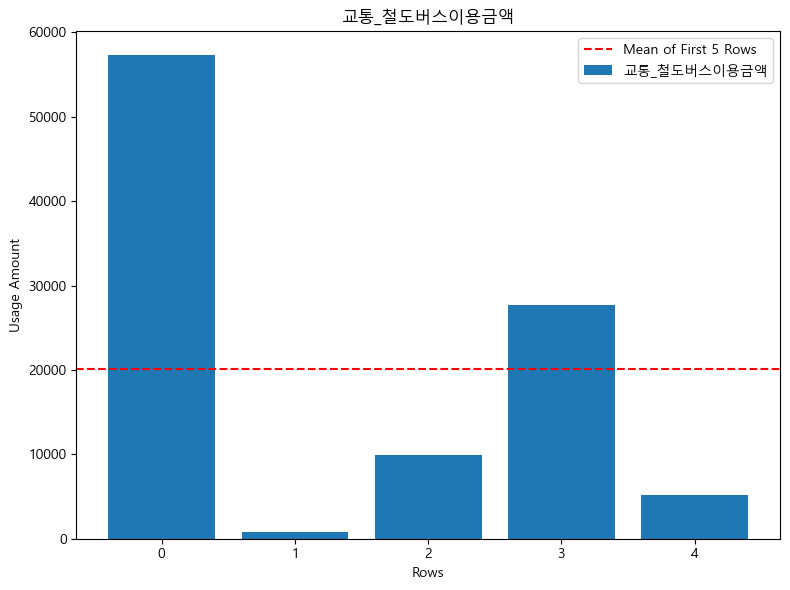

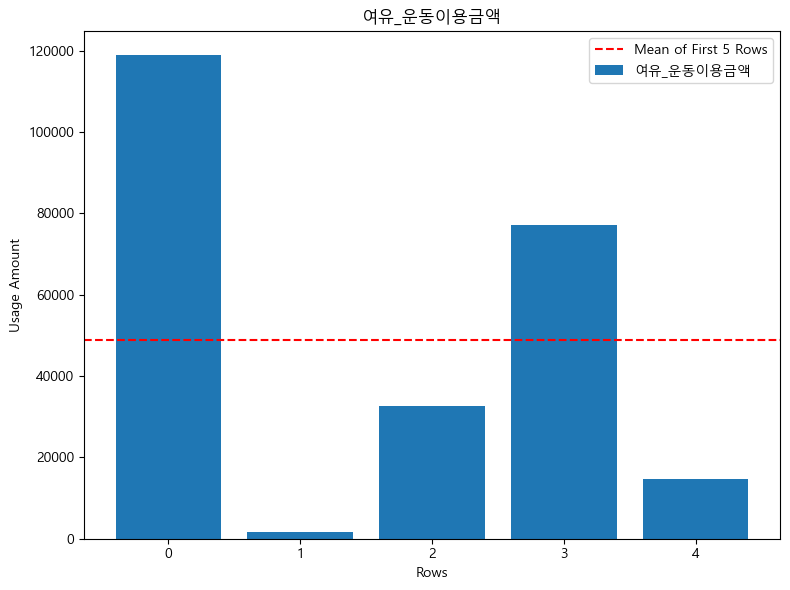

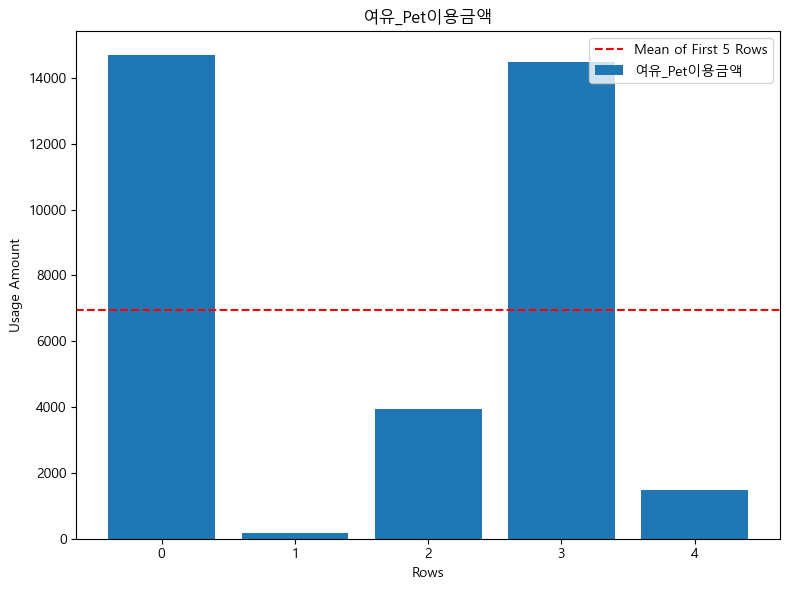

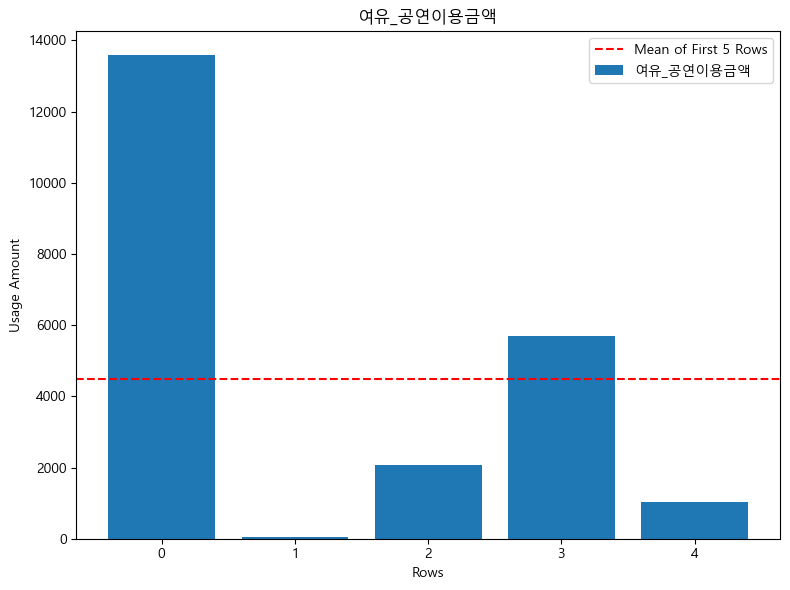

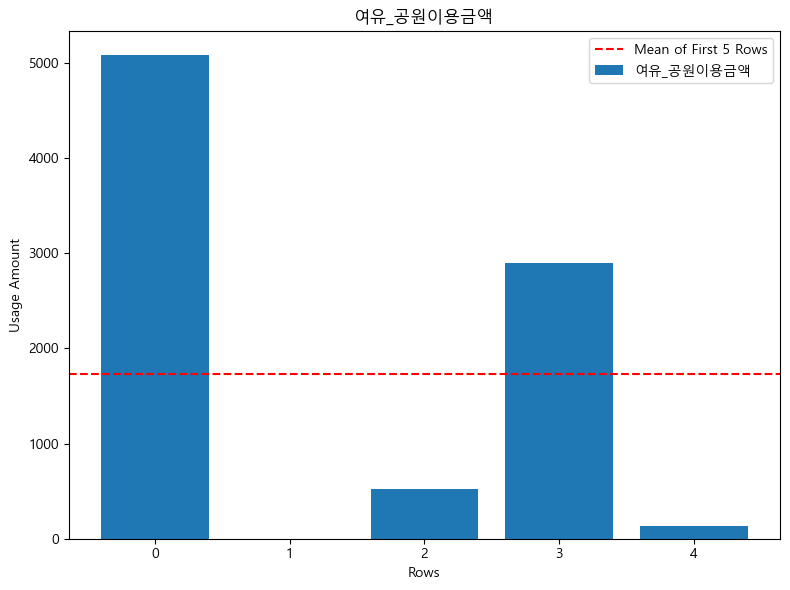

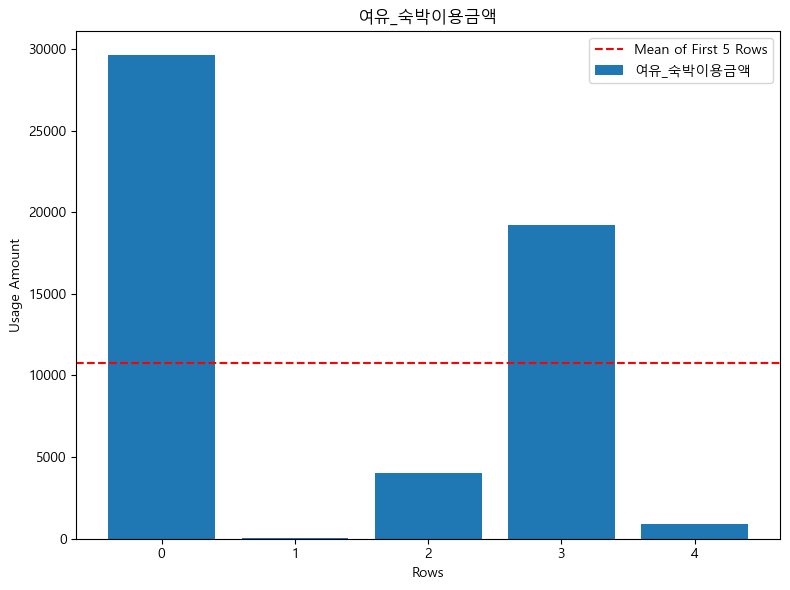

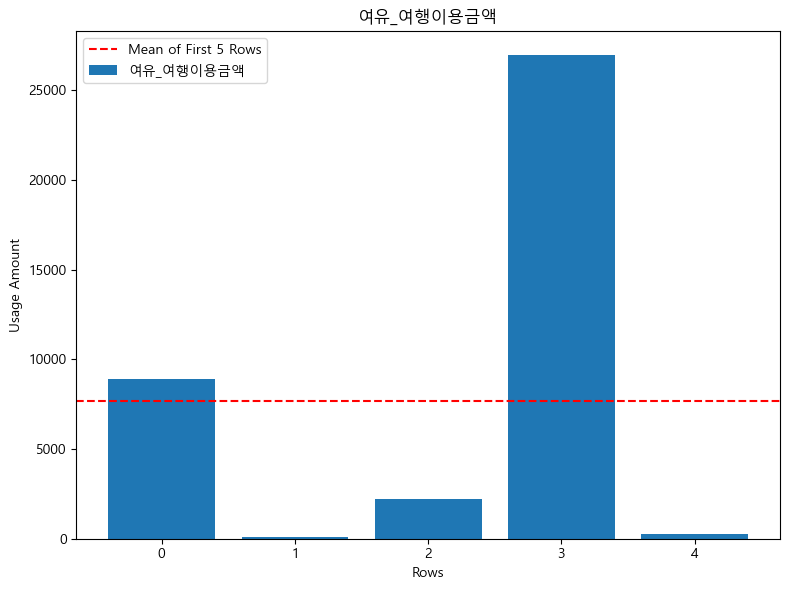

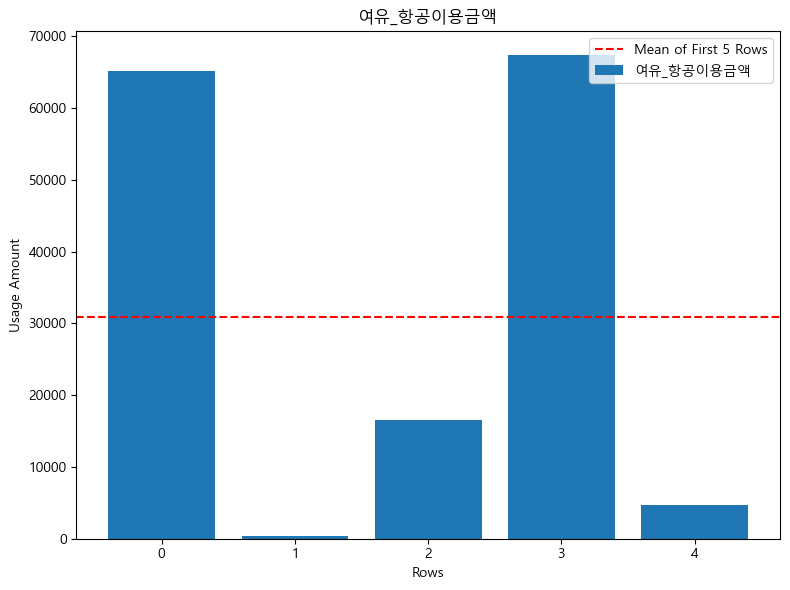

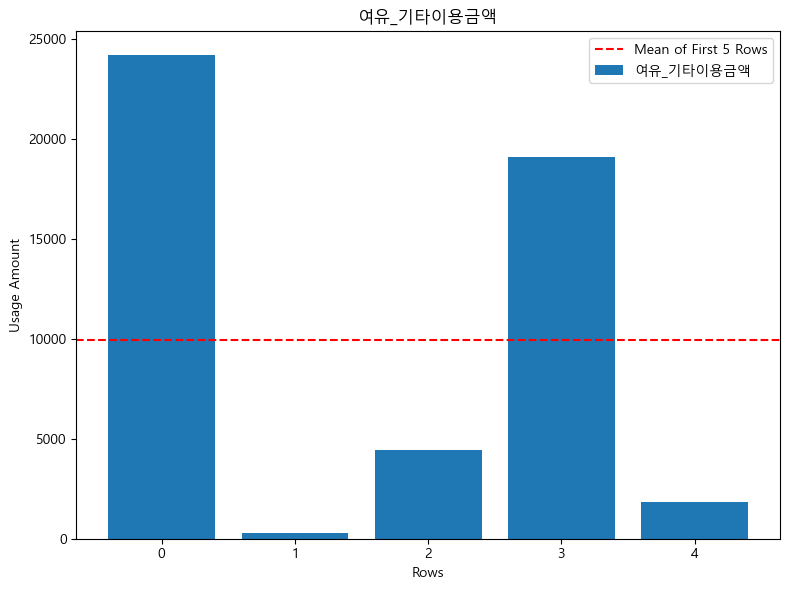

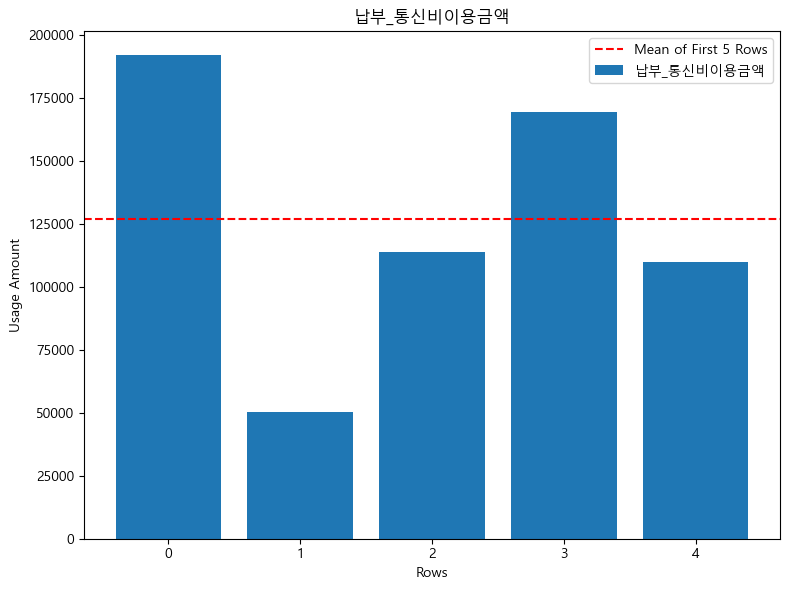

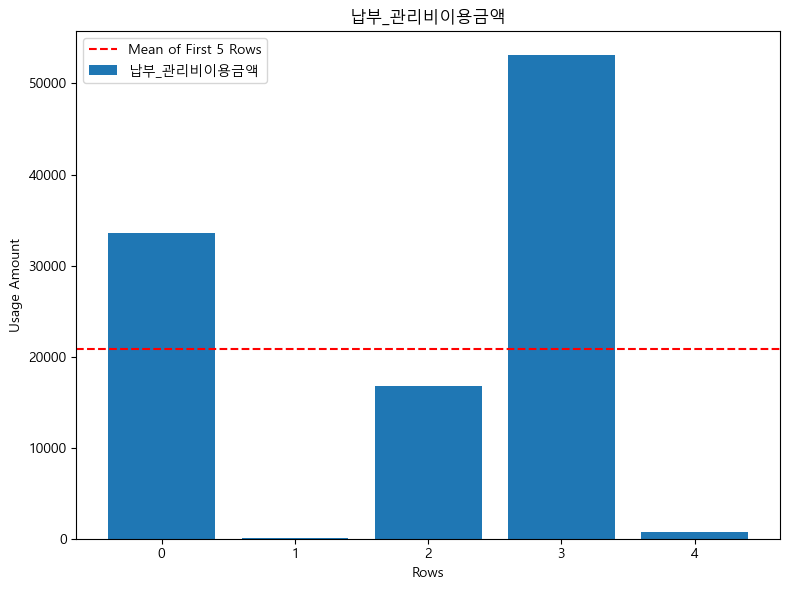

C:\Users\User\AppData\Local\Temp\ipykernel_22056\829516982.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


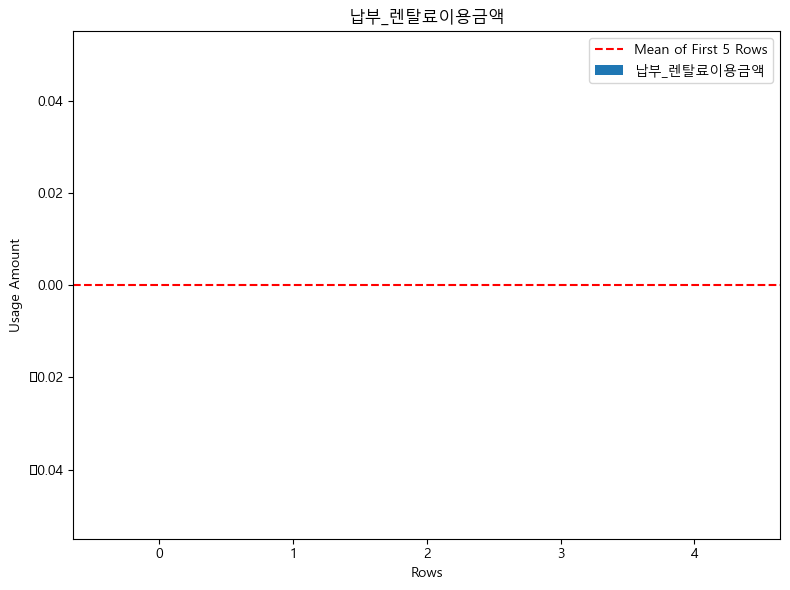

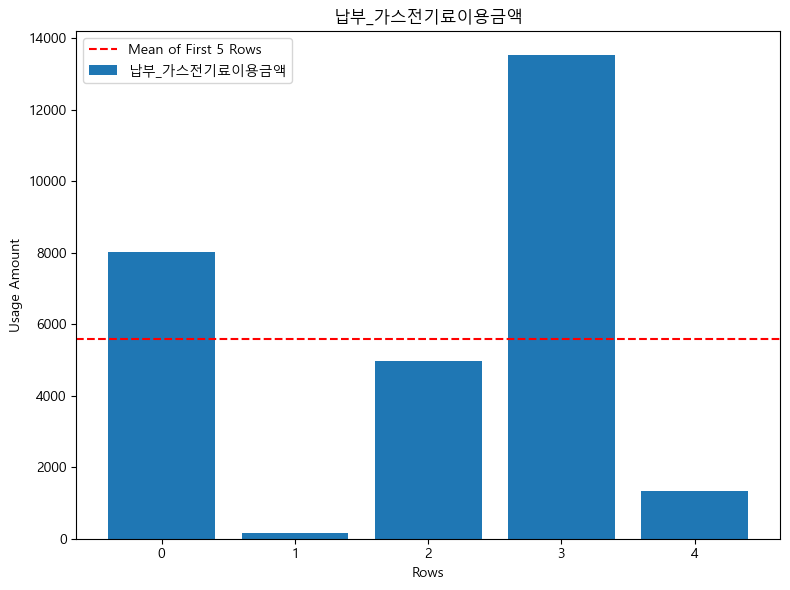

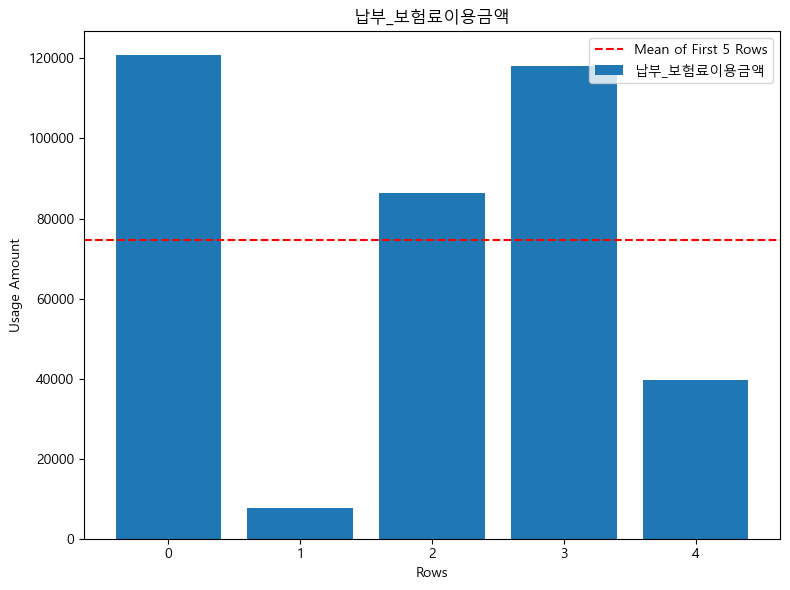

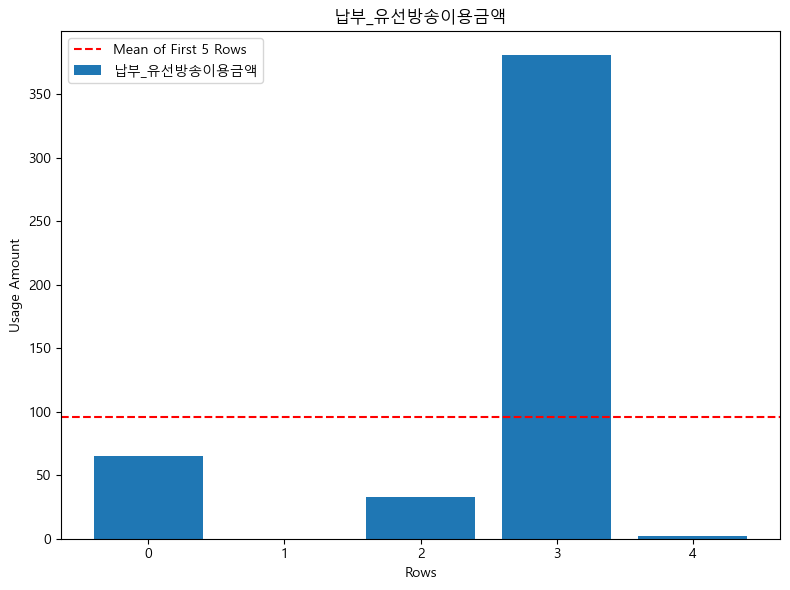

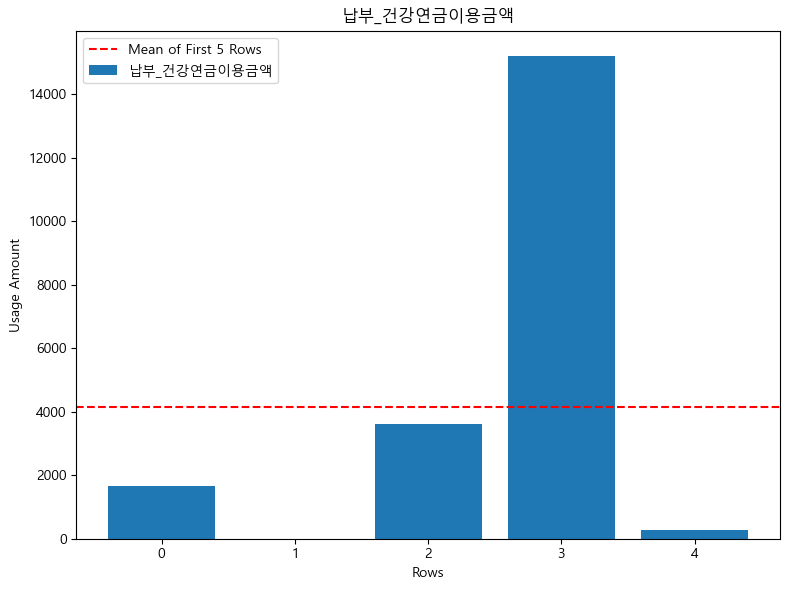

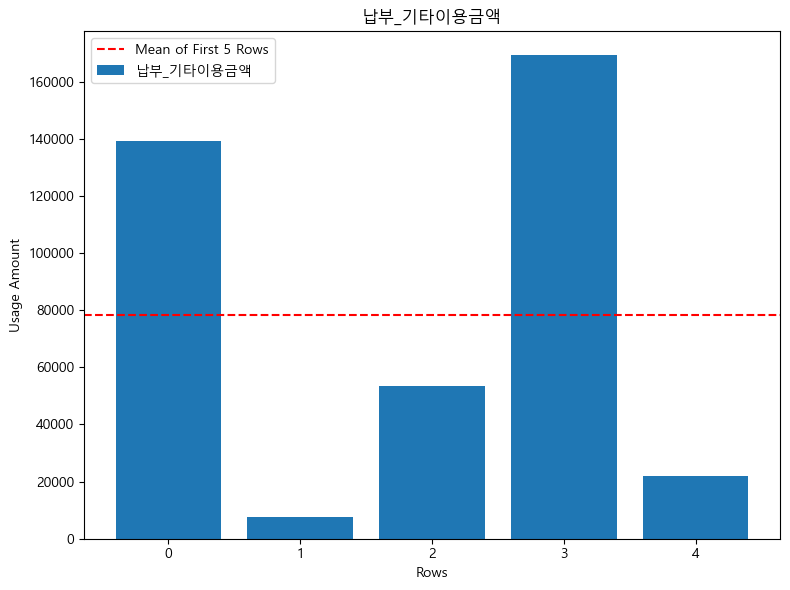

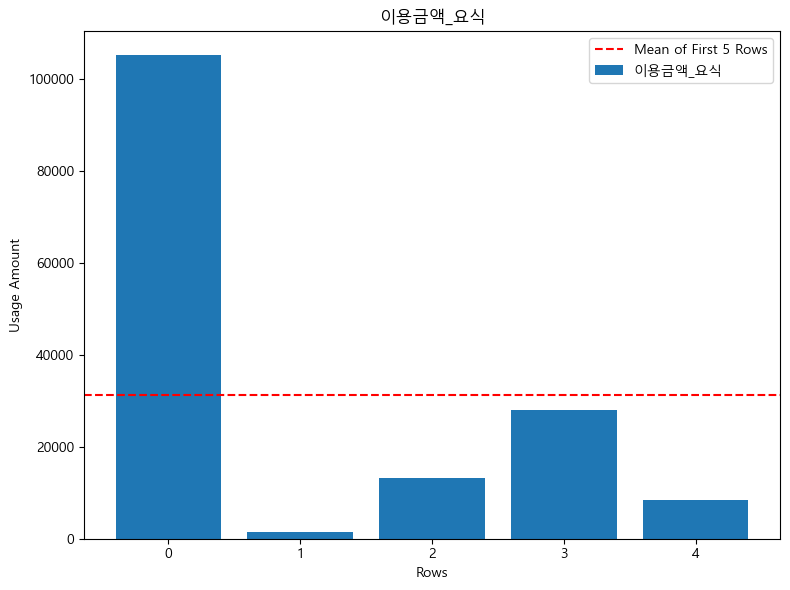

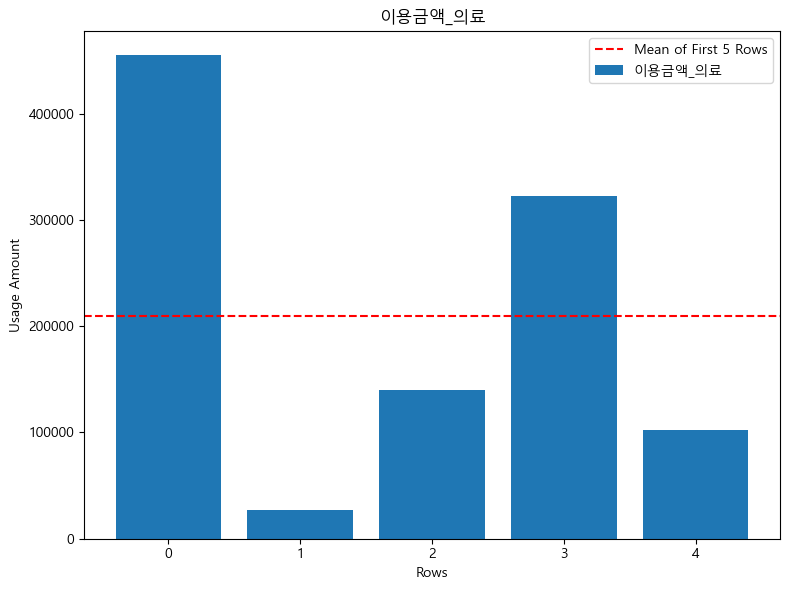

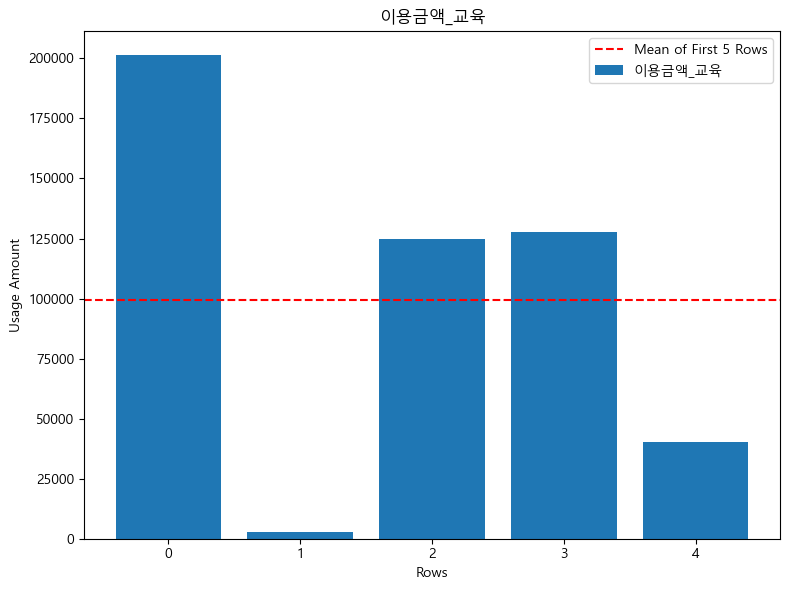

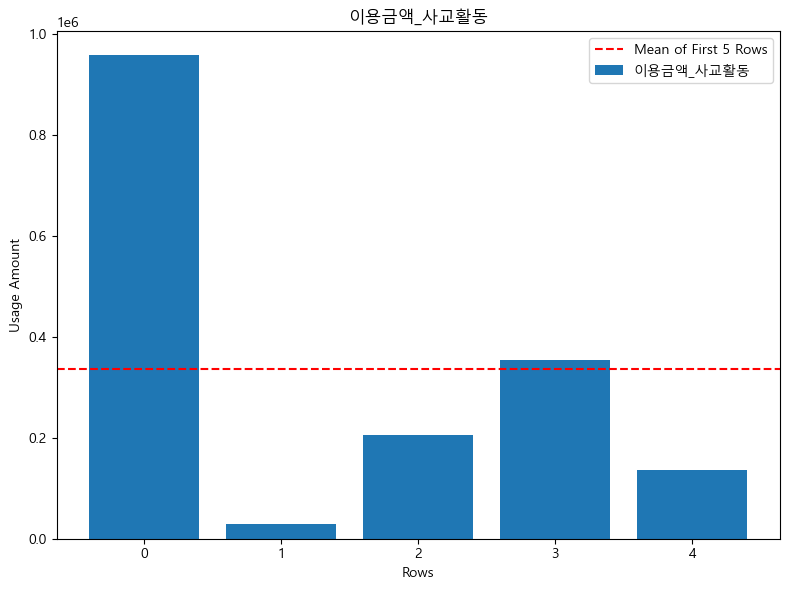

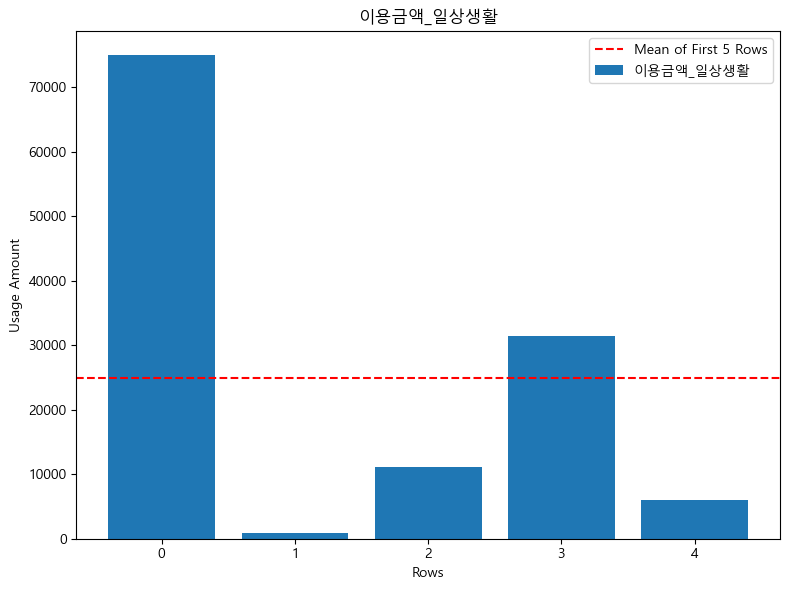

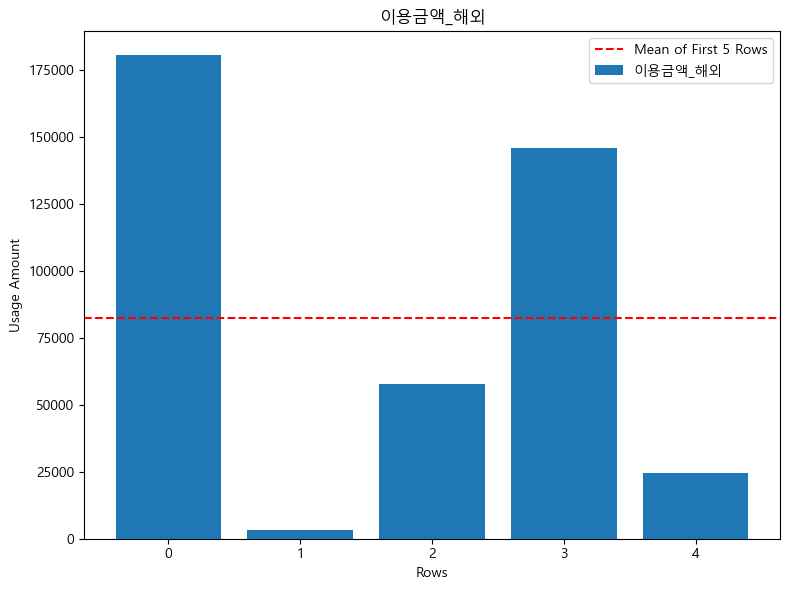

In [136]:
#크게보기
#Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5, 1:].mean()

# Plotting for each column
for col_index in range(1, len(cluster_mean.columns)):
    column_name = cluster_mean.columns[col_index]
    
    plt.figure(figsize=(8, 6))
    plt.bar(range(5), cluster_mean.iloc[:5, col_index], label=column_name)
    plt.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    plt.xlabel('Rows')
    plt.ylabel('Usage Amount')
    plt.title(column_name)
    plt.legend()
    plt.xticks(range(5))
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22056\139513954.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


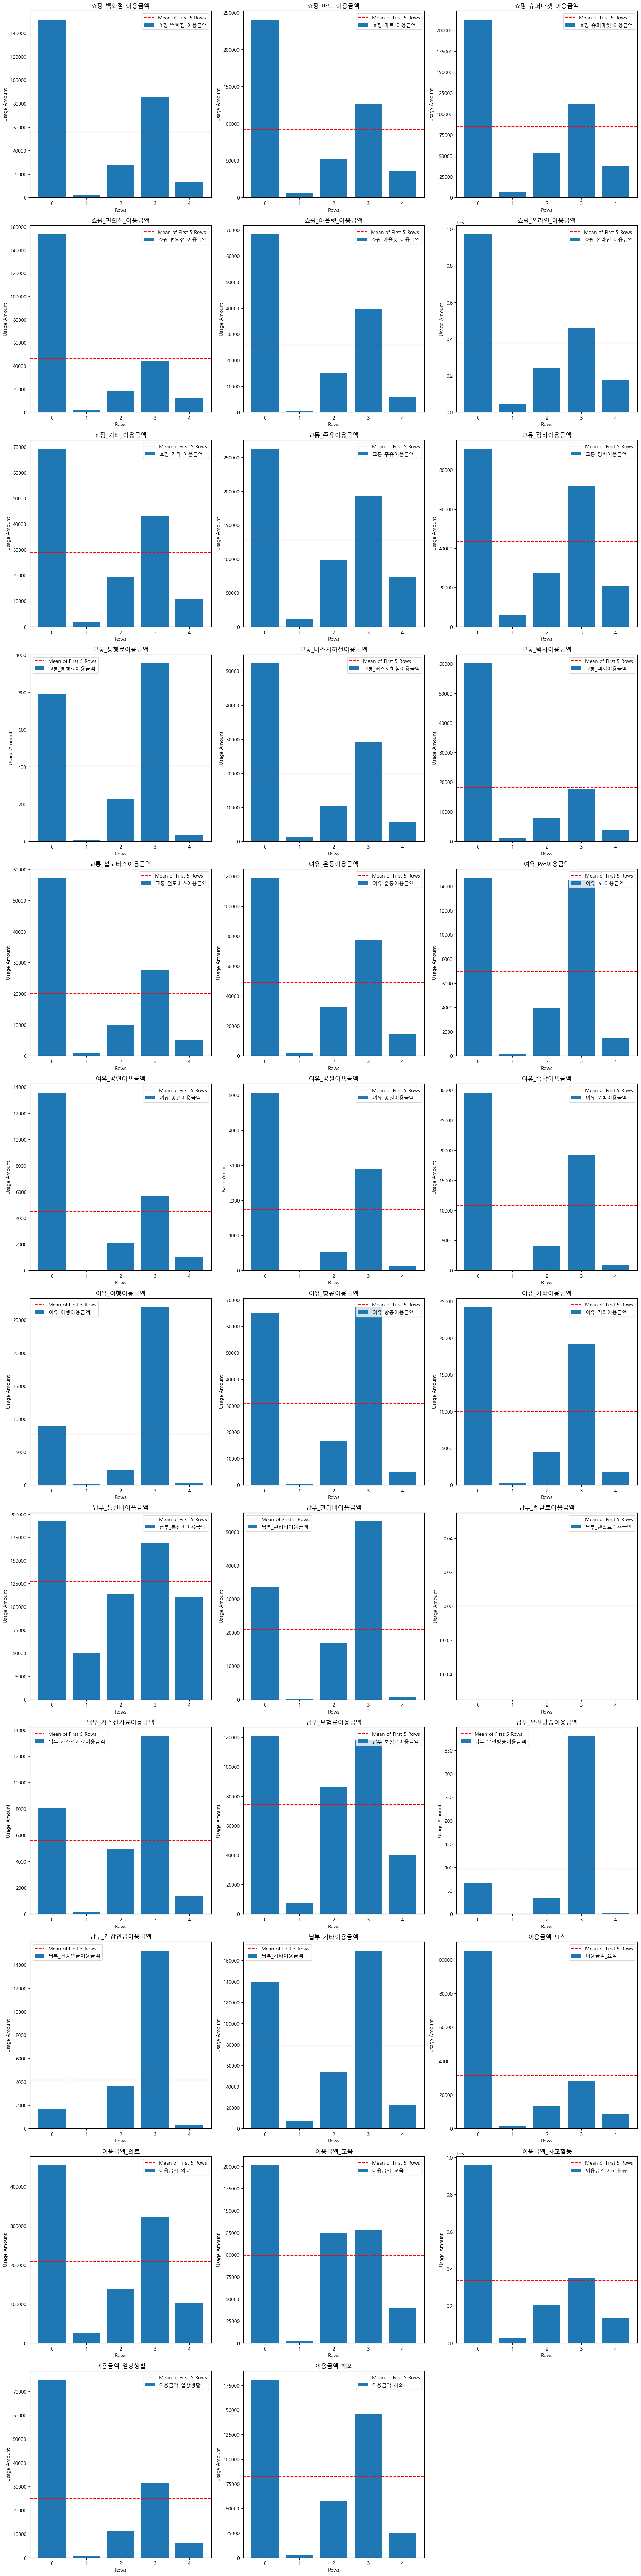

In [137]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), cluster_mean.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [123]:
column_means = pd.DataFrame(cluster_mean.mean(axis=0)).T
column_means['평균'] = 'column_means'  #
cluster_mean = cluster_mean.append(column_means, ignore_index=True)
cluster_mean

C:\Users\User\AppData\Local\Temp\ipykernel_22056\1209997815.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_mean = cluster_mean.append(column_means, ignore_index=True)


,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,평균
0,406763.999430,151243.427024,240076.528506,212450.352338,153535.558723,68307.027366,970989.555302,69178.675599,262521.455530,90689.513113,...,65.159635,1654.054732,139149.511973,105211.214367,454703.011973,201219.370011,957173.870582,74886.929875,180491.295325,NaN
1,17706.731273,2577.560000,5846.665455,6285.741818,2285.930909,530.767273,44083.953818,1598.254545,11739.991273,6081.458182,...,0.000000,0.000000,7671.742182,1394.814545,26729.225455,2703.098182,28895.929091,915.763636,3313.190182,NaN
2,123040.851327,27580.838348,52493.679056,53606.294395,18625.545723,14941.901475,241084.348673,19395.320944,98803.789971,27521.106195,...,33.021239,3609.697935,53615.281416,13217.914454,139477.738643,124742.293215,204615.136283,11176.802360,57756.380531,NaN
3,245861.493853,85211.973718,126898.013565,111895.831708,44115.844850,39531.153031,459280.538788,43180.225519,192369.699449,71558.258584,...,380.425604,15209.894447,169184.818143,28045.570157,322780.850360,127796.387028,353588.570157,31425.752437,146101.996609,NaN
4,82742.652566,12969.181692,36100.325936,38208.144244,11771.809986,5619.972261,175998.180305,10831.539528,73841.691401,20857.000000,...,2.288488,276.981969,22100.524965,8422.545076,101856.857836,40240.450763,135876.991678,6032.461859,24673.887656,NaN
5,175223.145690,55916.596156,92283.042504,84489.272901,46066.938038,25786.164281,378287.315377,28836.803227,127855.325525,43341.467215,...,96.178993,4150.125817,78344.375736,31258.411720,209109.536853,99340.319840,336030.099558,24887.542033,82467.350061,column_means


In [38]:
tm=c1[['이용건수_신용_B0M','이용건수_신용_R3M', '이용건수_신용_R6M','이용건수_신용_R12M']]
tm

,이용건수_신용_B0M,이용건수_신용_R3M,이용건수_신용_R6M,이용건수_신용_R12M
195274,56,152,359,696
13202,18,64,133,177
265703,41,141,313,676
107278,23,70,140,283
90766,82,291,698,1285
...,...,...,...,...
230957,77,230,269,275
25478,30,105,229,403
90725,46,142,364,503
158995,105,281,638,1242


In [39]:
# 열들의 평균값 계산
column_means = tm.mean()

# 열들에 평균값 넣기
tm_filled = tm.copy()
tm_filled.loc['average'] = column_means
tm_filled 

,이용건수_신용_B0M,이용건수_신용_R3M,이용건수_신용_R6M,이용건수_신용_R12M
195274,56.000000,152.000000,359.000000,696.000000
13202,18.000000,64.000000,133.000000,177.000000
265703,41.000000,141.000000,313.000000,676.000000
107278,23.000000,70.000000,140.000000,283.000000
90766,82.000000,291.000000,698.000000,1285.000000
...,...,...,...,...
25478,30.000000,105.000000,229.000000,403.000000
90725,46.000000,142.000000,364.000000,503.000000
158995,105.000000,281.000000,638.000000,1242.000000
146771,39.000000,77.000000,175.000000,330.000000


In [30]:
tm=c1[['이용건수_신판_B0M','이용건수_신판_R3M', '이용건수_신판_R6M','이용건수_신판_R12M']]
tm

,이용건수_신판_B0M,이용건수_신판_R3M,이용건수_신판_R6M,이용건수_신판_R12M
195274,56,152,359,696
13202,17,60,128,171
265703,41,141,313,676
107278,23,70,140,283
90766,82,291,698,1285
...,...,...,...,...
230957,77,230,269,275
25478,30,105,229,403
90725,44,138,360,499
158995,105,281,638,1242


In [32]:
# 열들의 평균값 계산
column_means = tm.mean()

# 열들에 평균값 넣기
tm_filled1 = tm.copy()
tm_filled1.loc['average'] = column_means
tm_filled1

,이용건수_신판_B0M,이용건수_신판_R3M,이용건수_신판_R6M,이용건수_신판_R12M
195274,56.000000,152.000000,359.000000,696.000000
13202,17.000000,60.000000,128.000000,171.000000
265703,41.000000,141.000000,313.000000,676.000000
107278,23.000000,70.000000,140.000000,283.000000
90766,82.000000,291.000000,698.000000,1285.000000
...,...,...,...,...
25478,30.000000,105.000000,229.000000,403.000000
90725,44.000000,138.000000,360.000000,499.000000
158995,105.000000,281.000000,638.000000,1242.000000
146771,39.000000,77.000000,175.000000,330.000000


In [73]:
c0=df2[df2['cluster']==0]
c1=df2[df2['cluster']==1]
c2=df2[df2['cluster']==2]
c3=df2[df2['cluster']==3]
c4=df2[df2['cluster']==4]

# 클러스터0번의 컨택방법별 전월 평균값

In [74]:
tm=c0['컨택건수_카드론_TM_B0M']+c0['컨택건수_리볼빙_TM_B0M']+c0['컨택건수_CA_TM_B0M']+c0['컨택건수_이용유도_TM_B0M']+c0['컨택건수_신용발급_TM_B0M']+c0['컨택건수_부대서비스_TM_B0M']+c0['컨택건수_포인트소진_TM_B0M']+c0['컨택건수_보험_TM_B0M']

lms=c0['컨택건수_카드론_LMS_B0M']+c0['컨택건수_CA_LMS_B0M']+c0['컨택건수_리볼빙_LMS_B0M']+c0['컨택건수_이용유도_LMS_B0M']

em=c0['컨택건수_카드론_EM_B0M']+c0['컨택건수_CA_EM_B0M']+c0['컨택건수_리볼빙_EM_B0M']+c0['컨택건수_이용유도_EM_B0M']

charge=c0['컨택건수_카드론_청구서_B0M']+c0['컨택건수_CA_청구서_B0M']+c0['컨택건수_리볼빙_청구서_B0M']+c0['컨택건수_이용유도_청구서_B0M']

internet=c0['컨택건수_카드론_인터넷_B0M']+c0['컨택건수_CA_인터넷_B0M']+c0['컨택건수_리볼빙_인터넷_B0M']+c0['컨택건수_이용유도_인터넷_B0M']


In [75]:
new=pd.concat([tm, lms, em, charge, internet], axis=1)
new

,0,1,2,3,4
195274,0,0,5,0,0
13202,0,0,0,0,0
265703,0,1,14,0,1
107278,0,0,2,0,0
90766,0,2,11,3,1
...,...,...,...,...,...
230957,0,0,3,0,0
25478,0,1,2,3,0
90725,1,0,3,1,0
158995,0,1,2,3,0


In [77]:
# 열들의 평균값 계산
column_means0 = new.mean()

# 열들에 평균값 넣기
new_filled0 = new.copy()
new_filled0.loc['average'] = column_means0
new_filled0

,0,1,2,3,4
195274,0.000000,0.00000,5.000000,0.000000,0.000000
13202,0.000000,0.00000,0.000000,0.000000,0.000000
265703,0.000000,1.00000,14.000000,0.000000,1.000000
107278,0.000000,0.00000,2.000000,0.000000,0.000000
90766,0.000000,2.00000,11.000000,3.000000,1.000000
...,...,...,...,...,...
25478,0.000000,1.00000,2.000000,3.000000,0.000000
90725,1.000000,0.00000,3.000000,1.000000,0.000000
158995,0.000000,1.00000,2.000000,3.000000,0.000000
146771,4.000000,0.00000,8.000000,0.000000,1.000000


In [78]:
new_filled0.columns = ['tm', 'lms', 'em', 'charge', 'internet']
new_filled0

,tm,lms,em,charge,internet
195274,0.000000,0.00000,5.000000,0.000000,0.000000
13202,0.000000,0.00000,0.000000,0.000000,0.000000
265703,0.000000,1.00000,14.000000,0.000000,1.000000
107278,0.000000,0.00000,2.000000,0.000000,0.000000
90766,0.000000,2.00000,11.000000,3.000000,1.000000
...,...,...,...,...,...
25478,0.000000,1.00000,2.000000,3.000000,0.000000
90725,1.000000,0.00000,3.000000,1.000000,0.000000
158995,0.000000,1.00000,2.000000,3.000000,0.000000
146771,4.000000,0.00000,8.000000,0.000000,1.000000


In [79]:
column_means0

0    0.446978
1    0.818130
2    3.866021
3    0.924173
4    0.286773
dtype: float64

In [80]:
#1번클러스터
tm=c1['컨택건수_카드론_TM_B0M']+c1['컨택건수_리볼빙_TM_B0M']+c1['컨택건수_CA_TM_B0M']+c1['컨택건수_이용유도_TM_B0M']+c1['컨택건수_신용발급_TM_B0M']+c1['컨택건수_부대서비스_TM_B0M']+c1['컨택건수_포인트소진_TM_B0M']+c1['컨택건수_보험_TM_B0M']

lms=c1['컨택건수_카드론_LMS_B0M']+c1['컨택건수_CA_LMS_B0M']+c1['컨택건수_리볼빙_LMS_B0M']+c1['컨택건수_이용유도_LMS_B0M']

em=c1['컨택건수_카드론_EM_B0M']+c1['컨택건수_CA_EM_B0M']+c1['컨택건수_리볼빙_EM_B0M']+c1['컨택건수_이용유도_EM_B0M']

charge=c1['컨택건수_카드론_청구서_B0M']+c1['컨택건수_CA_청구서_B0M']+c1['컨택건수_리볼빙_청구서_B0M']+c1['컨택건수_이용유도_청구서_B0M']

internet=c1['컨택건수_카드론_인터넷_B0M']+c1['컨택건수_CA_인터넷_B0M']+c1['컨택건수_리볼빙_인터넷_B0M']+c1['컨택건수_이용유도_인터넷_B0M']

new=pd.concat([tm, lms, em, charge, internet], axis=1)
# 열들의 평균값 계산
column_means1 = new.mean()

# 열들에 평균값 넣기
new_filled1 = new.copy()
new_filled1.loc['average'] = column_means1
new_filled1

,0,1,2,3,4
50633,1.000000,1.000,0.000000,0.000000,0.000000
208687,0.000000,0.000,0.000000,0.000000,0.000000
79074,1.000000,0.000,3.000000,1.000000,1.000000
268615,4.000000,0.000,10.000000,0.000000,0.000000
37219,0.000000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...
111265,0.000000,0.000,0.000000,0.000000,0.000000
229109,1.000000,0.000,2.000000,0.000000,0.000000
87381,0.000000,0.000,7.000000,0.000000,0.000000
180089,1.000000,2.000,0.000000,3.000000,0.000000


In [81]:
#2번클러스터
tm=c2['컨택건수_카드론_TM_B0M']+c2['컨택건수_리볼빙_TM_B0M']+c2['컨택건수_CA_TM_B0M']+c2['컨택건수_이용유도_TM_B0M']+c2['컨택건수_신용발급_TM_B0M']+c2['컨택건수_부대서비스_TM_B0M']+c2['컨택건수_포인트소진_TM_B0M']+c2['컨택건수_보험_TM_B0M']

lms=c2['컨택건수_카드론_LMS_B0M']+c2['컨택건수_CA_LMS_B0M']+c2['컨택건수_리볼빙_LMS_B0M']+c2['컨택건수_이용유도_LMS_B0M']

em=c2['컨택건수_카드론_EM_B0M']+c2['컨택건수_CA_EM_B0M']+c2['컨택건수_리볼빙_EM_B0M']+c2['컨택건수_이용유도_EM_B0M']

charge=c2['컨택건수_카드론_청구서_B0M']+c2['컨택건수_CA_청구서_B0M']+c2['컨택건수_리볼빙_청구서_B0M']+c2['컨택건수_이용유도_청구서_B0M']

internet=c2['컨택건수_카드론_인터넷_B0M']+c2['컨택건수_CA_인터넷_B0M']+c2['컨택건수_리볼빙_인터넷_B0M']+c2['컨택건수_이용유도_인터넷_B0M']


new=pd.concat([tm, lms, em, charge, internet], axis=1)
# 열들의 평균값 계산
column_means2 = new.mean()

# 열들에 평균값 넣기
new_filled2 = new.copy()
new_filled2.loc['average'] = column_means2
new_filled2

,0,1,2,3,4
227619,1.000000,1.000000,0.000000,0.000000,0.00000
131208,2.000000,4.000000,11.000000,1.000000,1.00000
29653,0.000000,0.000000,1.000000,0.000000,0.00000
132774,3.000000,1.000000,2.000000,0.000000,0.00000
197942,0.000000,0.000000,2.000000,0.000000,0.00000
...,...,...,...,...,...
8654,0.000000,0.000000,2.000000,2.000000,0.00000
74006,2.000000,0.000000,2.000000,1.000000,0.00000
51787,0.000000,0.000000,0.000000,0.000000,0.00000
89312,0.000000,0.000000,2.000000,0.000000,0.00000


In [82]:
tm=c3['컨택건수_카드론_TM_B0M']+c3['컨택건수_리볼빙_TM_B0M']+c3['컨택건수_CA_TM_B0M']+c3['컨택건수_이용유도_TM_B0M']+c3['컨택건수_신용발급_TM_B0M']+c3['컨택건수_부대서비스_TM_B0M']+c3['컨택건수_포인트소진_TM_B0M']+c3['컨택건수_보험_TM_B0M']

lms=c3['컨택건수_카드론_LMS_B0M']+c3['컨택건수_CA_LMS_B0M']+c3['컨택건수_리볼빙_LMS_B0M']+c3['컨택건수_이용유도_LMS_B0M']

em=c3['컨택건수_카드론_EM_B0M']+c3['컨택건수_CA_EM_B0M']+c3['컨택건수_리볼빙_EM_B0M']+c3['컨택건수_이용유도_EM_B0M']

charge=c3['컨택건수_카드론_청구서_B0M']+c3['컨택건수_CA_청구서_B0M']+c3['컨택건수_리볼빙_청구서_B0M']+c3['컨택건수_이용유도_청구서_B0M']

internet=c3['컨택건수_카드론_인터넷_B0M']+c3['컨택건수_CA_인터넷_B0M']+c3['컨택건수_리볼빙_인터넷_B0M']+c3['컨택건수_이용유도_인터넷_B0M']
new=pd.concat([tm, lms, em, charge, internet], axis=1)
# 열들의 평균값 계산
column_means3 = new.mean()

# 열들에 평균값 넣기
new_filled3 = new.copy()
new_filled3.loc['average'] = column_means3
new_filled3

,0,1,2,3,4
159882,0.000000,0.000000,1.000000,1.000000,0.000000
170615,0.000000,0.000000,2.000000,1.000000,0.000000
263322,0.000000,0.000000,2.000000,1.000000,0.000000
288490,1.000000,0.000000,1.000000,0.000000,0.000000
83584,2.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
1173,0.000000,0.000000,2.000000,1.000000,1.000000
242082,1.000000,1.000000,3.000000,0.000000,0.000000
212704,0.000000,1.000000,3.000000,3.000000,1.000000
77966,0.000000,0.000000,1.000000,0.000000,0.000000


In [83]:
tm=c4['컨택건수_카드론_TM_B0M']+c4['컨택건수_리볼빙_TM_B0M']+c4['컨택건수_CA_TM_B0M']+c4['컨택건수_이용유도_TM_B0M']+c4['컨택건수_신용발급_TM_B0M']+c4['컨택건수_부대서비스_TM_B0M']+c4['컨택건수_포인트소진_TM_B0M']+c4['컨택건수_보험_TM_B0M']

lms=c4['컨택건수_카드론_LMS_B0M']+c4['컨택건수_CA_LMS_B0M']+c4['컨택건수_리볼빙_LMS_B0M']+c4['컨택건수_이용유도_LMS_B0M']

em=c4['컨택건수_카드론_EM_B0M']+c4['컨택건수_CA_EM_B0M']+c4['컨택건수_리볼빙_EM_B0M']+c4['컨택건수_이용유도_EM_B0M']

charge=c4['컨택건수_카드론_청구서_B0M']+c4['컨택건수_CA_청구서_B0M']+c4['컨택건수_리볼빙_청구서_B0M']+c4['컨택건수_이용유도_청구서_B0M']

internet=c4['컨택건수_카드론_인터넷_B0M']+c4['컨택건수_CA_인터넷_B0M']+c4['컨택건수_리볼빙_인터넷_B0M']+c4['컨택건수_이용유도_인터넷_B0M']

new=pd.concat([tm, lms, em, charge, internet], axis=1)
# 열들의 평균값 계산
column_means4 = new.mean()

# 열들에 평균값 넣기
new_filled4 = new.copy()
new_filled4.loc['average'] = column_means4
new_filled4

,0,1,2,3,4
129525,0.000000,0.000000,0.000000,0.000000,0.000000
124057,1.000000,2.000000,0.000000,1.000000,0.000000
5758,0.000000,0.000000,1.000000,1.000000,0.000000
84644,2.000000,2.000000,9.000000,0.000000,0.000000
285218,0.000000,0.000000,5.000000,0.000000,0.000000
...,...,...,...,...,...
241826,0.000000,0.000000,0.000000,0.000000,0.000000
241726,0.000000,0.000000,2.000000,0.000000,0.000000
99151,0.000000,3.000000,1.000000,1.000000,0.000000
17175,1.000000,0.000000,0.000000,0.000000,0.000000


In [86]:
#전월, 컨택방법별 평균값
means=pd.concat([column_means0, column_means1, column_means2, column_means3, column_means4], axis=1)
means.columns = ['tm', 'lms', 'em', 'charge', 'internet']
means

,tm,lms,em,charge,internet
0,0.446978,0.536727,0.551622,0.434506,0.466713
1,0.818130,0.588000,0.502065,0.561255,0.486824
2,3.866021,2.106182,2.444248,2.851208,2.412621
3,0.924173,0.253091,0.460767,0.600678,0.361304
4,0.286773,0.105455,0.195280,0.219585,0.176144


In [87]:
tm1=c0['컨택건수_카드론_TM_R6M']+c0['컨택건수_리볼빙_TM_R6M']+c0['컨택건수_CA_TM_R6M']+c0['컨택건수_이용유도_TM_R6M']+c0['컨택건수_신용발급_TM_R6M']+c0['컨택건수_부대서비스_TM_R6M']+c0['컨택건수_포인트소진_TM_R6M']+c0['컨택건수_보험_TM_R6M']

lms1=c0['컨택건수_카드론_LMS_R6M']+c0['컨택건수_CA_LMS_R6M']+c0['컨택건수_리볼빙_LMS_R6M']+c0['컨택건수_이용유도_LMS_R6M']

em1=c0['컨택건수_카드론_EM_R6M']+c0['컨택건수_CA_EM_R6M']+c0['컨택건수_리볼빙_EM_R6M']+c0['컨택건수_이용유도_EM_R6M']

charge1=c0['컨택건수_카드론_청구서_R6M']+c0['컨택건수_CA_청구서_R6M']+c0['컨택건수_리볼빙_청구서_R6M']+c0['컨택건수_이용유도_청구서_R6M']

internet1=c0['컨택건수_카드론_인터넷_R6M']+c0['컨택건수_CA_인터넷_R6M']+c0['컨택건수_리볼빙_인터넷_R6M']
new1=pd.concat([tm1, lms1, em1, charge1, internet1], axis=1)
# 열들의 평균값 계산
column_means10 = new1.mean()

# 열들에 평균값 넣기
new_filled10 = new1.copy()
new_filled10.loc['average'] = column_means10
new_filled10

,0,1,2,3,4
195274,2.000000,4.000000,16.000000,0.000000,0.0
13202,0.000000,0.000000,4.000000,3.000000,0.0
265703,4.000000,6.000000,75.000000,0.000000,0.0
107278,0.000000,4.000000,5.000000,4.000000,0.0
90766,1.000000,13.000000,61.000000,12.000000,0.0
...,...,...,...,...,...
25478,0.000000,7.000000,5.000000,16.000000,0.0
90725,8.000000,9.000000,12.000000,3.000000,0.0
158995,2.000000,6.000000,5.000000,12.000000,0.0
146771,13.000000,6.000000,55.000000,0.000000,0.0


In [89]:
tm1=c2['컨택건수_카드론_TM_R6M']+c2['컨택건수_리볼빙_TM_R6M']+c2['컨택건수_CA_TM_R6M']+c2['컨택건수_이용유도_TM_R6M']+c2['컨택건수_신용발급_TM_R6M']+c2['컨택건수_부대서비스_TM_R6M']+c2['컨택건수_포인트소진_TM_R6M']+c2['컨택건수_보험_TM_R6M']

lms1=c2['컨택건수_카드론_LMS_R6M']+c2['컨택건수_CA_LMS_R6M']+c2['컨택건수_리볼빙_LMS_R6M']+c2['컨택건수_이용유도_LMS_R6M']

em1=c2['컨택건수_카드론_EM_R6M']+c2['컨택건수_CA_EM_R6M']+c2['컨택건수_리볼빙_EM_R6M']+c2['컨택건수_이용유도_EM_R6M']

charge1=c2['컨택건수_카드론_청구서_R6M']+c2['컨택건수_CA_청구서_R6M']+c2['컨택건수_리볼빙_청구서_R6M']+c2['컨택건수_이용유도_청구서_R6M']

internet1=c2['컨택건수_카드론_인터넷_R6M']+c2['컨택건수_CA_인터넷_R6M']+c2['컨택건수_리볼빙_인터넷_R6M']

new1=pd.concat([tm1, lms1, em1, charge1, internet1], axis=1)

# 열들의 평균값 계산
column_means12 = new1.mean()

# 열들에 평균값 넣기
new_filled12 = new1.copy()
new_filled12.loc['average'] = column_means12
new_filled12

,0,1,2,3,4
227619,8.000000,8.000000,5.000000,4.000000,0.0
131208,6.000000,15.000000,61.000000,2.000000,0.0
29653,0.000000,0.000000,4.000000,3.000000,0.0
132774,12.000000,15.000000,20.000000,3.000000,0.0
197942,0.000000,0.000000,3.000000,1.000000,0.0
...,...,...,...,...,...
8654,0.000000,0.000000,4.000000,5.000000,0.0
74006,3.000000,0.000000,5.000000,5.000000,0.0
51787,0.000000,8.000000,1.000000,8.000000,0.0
89312,0.000000,0.000000,3.000000,3.000000,0.0


In [90]:
tm1=c3['컨택건수_카드론_TM_R6M']+c3['컨택건수_리볼빙_TM_R6M']+c3['컨택건수_CA_TM_R6M']+c3['컨택건수_이용유도_TM_R6M']+c3['컨택건수_신용발급_TM_R6M']+c3['컨택건수_부대서비스_TM_R6M']+c3['컨택건수_포인트소진_TM_R6M']+c3['컨택건수_보험_TM_R6M']

lms1=c3['컨택건수_카드론_LMS_R6M']+c3['컨택건수_CA_LMS_R6M']+c3['컨택건수_리볼빙_LMS_R6M']+c3['컨택건수_이용유도_LMS_R6M']

em1=c3['컨택건수_카드론_EM_R6M']+c3['컨택건수_CA_EM_R6M']+c3['컨택건수_리볼빙_EM_R6M']+c3['컨택건수_이용유도_EM_R6M']

charge1=c3['컨택건수_카드론_청구서_R6M']+c3['컨택건수_CA_청구서_R6M']+c3['컨택건수_리볼빙_청구서_R6M']+c3['컨택건수_이용유도_청구서_R6M']

internet1=c3['컨택건수_카드론_인터넷_R6M']+c3['컨택건수_CA_인터넷_R6M']+c3['컨택건수_리볼빙_인터넷_R6M']

new1=pd.concat([tm1, lms1, em1, charge1, internet1], axis=1)

# 열들의 평균값 계산
column_means13 = new1.mean()

# 열들에 평균값 넣기
new_filled13 = new1.copy()
new_filled13.loc['average'] = column_means13
new_filled13

,0,1,2,3,4
159882,0.000000,0.000000,3.000000,4.000000,0.0
170615,0.000000,0.000000,3.000000,4.000000,0.0
263322,1.000000,0.000000,4.000000,1.000000,0.0
288490,7.000000,4.000000,8.000000,2.000000,0.0
83584,3.000000,1.000000,11.000000,4.000000,0.0
...,...,...,...,...,...
1173,3.000000,3.000000,9.000000,1.000000,0.0
242082,6.000000,11.000000,35.000000,2.000000,0.0
212704,0.000000,6.000000,12.000000,12.000000,0.0
77966,0.000000,2.000000,9.000000,8.000000,0.0


In [91]:
tm1=c4['컨택건수_카드론_TM_R6M']+c4['컨택건수_리볼빙_TM_R6M']+c4['컨택건수_CA_TM_R6M']+c4['컨택건수_이용유도_TM_R6M']+c4['컨택건수_신용발급_TM_R6M']+c4['컨택건수_부대서비스_TM_R6M']+c4['컨택건수_포인트소진_TM_R6M']+c4['컨택건수_보험_TM_R6M']

lms1=c4['컨택건수_카드론_LMS_R6M']+c4['컨택건수_CA_LMS_R6M']+c4['컨택건수_리볼빙_LMS_R6M']+c4['컨택건수_이용유도_LMS_R6M']

em1=c4['컨택건수_카드론_EM_R6M']+c4['컨택건수_CA_EM_R6M']+c4['컨택건수_리볼빙_EM_R6M']+c4['컨택건수_이용유도_EM_R6M']

charge1=c4['컨택건수_카드론_청구서_R6M']+c4['컨택건수_CA_청구서_R6M']+c4['컨택건수_리볼빙_청구서_R6M']+c4['컨택건수_이용유도_청구서_R6M']

internet1=c4['컨택건수_카드론_인터넷_R6M']+c4['컨택건수_CA_인터넷_R6M']+c4['컨택건수_리볼빙_인터넷_R6M']

new1=pd.concat([tm1, lms1, em1, charge1, internet1], axis=1)

# 열들의 평균값 계산
column_means14 = new1.mean()

# 열들에 평균값 넣기
new_filled14 = new1.copy()
new_filled14.loc['average'] = column_means14
new_filled14

,0,1,2,3,4
129525,1.000000,2.000000,6.000000,4.000000,0.0
124057,4.000000,7.000000,9.000000,2.000000,0.0
5758,0.000000,0.000000,2.000000,4.000000,0.0
84644,4.000000,12.000000,55.000000,7.000000,0.0
285218,0.000000,0.000000,52.000000,3.000000,0.0
...,...,...,...,...,...
241826,11.000000,1.000000,1.000000,9.000000,0.0
241726,0.000000,0.000000,3.000000,4.000000,0.0
99151,1.000000,9.000000,5.000000,1.000000,0.0
17175,21.000000,1.000000,3.000000,8.000000,0.0


In [92]:
#6개월, 컨택방법별 평균값
means1=pd.concat([column_means10, column_means11, column_means12, column_means13, column_means14], axis=1)
means1.columns = ['tm', 'lms', 'em', 'charge', 'internet']
means1

,tm,lms,em,charge,internet
0,3.444128,3.909818,3.753392,3.507418,3.722607
1,5.548461,4.065818,3.774631,4.123357,3.728155
2,19.327252,10.610545,12.074336,13.936414,12.130374
3,4.204105,2.446909,3.149853,3.459517,2.863384
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
new_filled2.columns = ['tm', 'lms', 'em', 'charge', 'internet']
new_filled2

,tm,lms,em,charge,internet
195274,2.000000,4.000000,16.000000,0.000000,0.0
13202,0.000000,0.000000,4.000000,3.000000,0.0
265703,4.000000,6.000000,75.000000,0.000000,0.0
107278,0.000000,4.000000,5.000000,4.000000,0.0
90766,1.000000,13.000000,61.000000,12.000000,0.0
...,...,...,...,...,...
25478,0.000000,7.000000,5.000000,16.000000,0.0
90725,8.000000,9.000000,12.000000,3.000000,0.0
158995,2.000000,6.000000,5.000000,12.000000,0.0
146771,13.000000,6.000000,55.000000,0.000000,0.0


In [66]:
card=c1['컨택건수_카드론_TM_B0M']+c1['컨택건수_카드론_LMS_B0M']+c1['컨택건수_카드론_EM_B0M']+c1['컨택건수_카드론_청구서_B0M']+c1['컨택건수_카드론_인터넷_B0M']

revolving=c1['컨택건수_리볼빙_TM_B0M']+c1['컨택건수_리볼빙_LMS_B0M']+c1['컨택건수_리볼빙_EM_B0M']+c1['컨택건수_리볼빙_청구서_B0M']+c1['컨택건수_리볼빙_인터넷_B0M']

ca=c1['컨택건수_CA_TM_B0M']+c1['컨택건수_CA_LMS_B0M']+c1['컨택건수_CA_EM_B0M']+c1['컨택건수_CA_청구서_B0M']+c1['컨택건수_CA_인터넷_B0M']

use=c1['컨택건수_이용유도_TM_B0M']+c1['컨택건수_이용유도_LMS_B0M']+c1['컨택건수_이용유도_EM_B0M']+c1['컨택건수_이용유도_청구서_B0M']+c1['컨택건수_이용유도_인터넷_B0M']

credit=c1['컨택건수_신용발급_TM_B0M']

extra=c1['컨택건수_부대서비스_TM_B0M']

point=c1['컨택건수_포인트소진_TM_B0M']

insurance=c1['컨택건수_보험_TM_B0M']

In [68]:
new2=pd.concat([card,revolving,ca,use,credit,extra,point,insurance], axis=1)
new2

,0,1,2,3,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M
195274,0,0,0,5,0,0,0,0
13202,0,0,0,0,0,0,0,0
265703,0,0,0,16,0,0,0,0
107278,0,0,0,2,0,0,0,0
90766,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...
230957,0,0,0,3,0,0,0,0
25478,0,0,0,6,0,0,0,0
90725,0,0,0,4,0,0,0,1
158995,0,0,0,6,0,0,0,0


In [69]:
# 열들의 평균값 계산
column_means = new2.mean()

# 열들에 평균값 넣기
new_filled3 = new2.copy()
new_filled3.loc['average'] = column_means
new_filled3

,0,1,2,3,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M
195274,0.000000,0.000000,0.000000,5.000000,0.00000,0.000000,0.000000,0.000000
13202,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
265703,0.000000,0.000000,0.000000,16.000000,0.00000,0.000000,0.000000,0.000000
107278,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000
90766,0.000000,0.000000,0.000000,17.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
25478,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000
90725,0.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,1.000000
158995,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000
146771,0.000000,0.000000,0.000000,10.000000,0.00000,0.000000,3.000000,0.000000


In [71]:
new_filled3.columns = ['카드론', '리볼빙', 'ca', '이용유도', '신용발급','부대서비스','포인트소진','보험']
new_filled3

,카드론,리볼빙,ca,이용유도,신용발급,부대서비스,포인트소진,보험
195274,0.000000,0.000000,0.000000,5.000000,0.00000,0.000000,0.000000,0.000000
13202,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
265703,0.000000,0.000000,0.000000,16.000000,0.00000,0.000000,0.000000,0.000000
107278,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000
90766,0.000000,0.000000,0.000000,17.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
25478,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000
90725,0.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,1.000000
158995,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000
146771,0.000000,0.000000,0.000000,10.000000,0.00000,0.000000,3.000000,0.000000


In [72]:
# 열들의 평균값 계산
column_sum = new2.sum()

# 열들에 평균값 넣기
new_filled3 = new2.copy()
new_filled3.loc['average'] = column_sum
new_filled3

,0,1,2,3,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M
195274,0,0,0,5,0,0,0,0
13202,0,0,0,0,0,0,0,0
265703,0,0,0,16,0,0,0,0
107278,0,0,0,2,0,0,0,0
90766,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...
25478,0,0,0,6,0,0,0,0
90725,0,0,0,4,0,0,0,1
158995,0,0,0,6,0,0,0,0
146771,0,0,0,10,0,0,3,0
